# Cap'n Crunch Can Eat A Bunch - But Should We?

Cereal serving sizes pictured on the box have almost twice as many calories as the serving size suggested on the nutrition facts label, I found during my internship at the Cornell Food and Brand Lab followed by an independent research study I conducted as a student at Dickinson College. This was long before I knew that I loved programming or that machine learning algorithms can produce linear regression models.

In this notebook, I load the dataset based on my own hands-on research (yes, cereal was a major food source during this time). I implement a linear regression machine learning model with sklearn to show the relationship between depicted vs. suggested serving size.

The study is part of a research article that I co-authored. It has been published in the <a href="https://pubmed.ncbi.nlm.nih.gov/28166756//">BMC Public Health Journal</a>.

### Import libraries

In [14]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### Load and format dataset

In [40]:
df = pd.read_csv('cereal_serving_sizes.csv')
df.drop('Unnamed: 13', inplace=True, axis=1)
df.columns = ['cereal_name', 'healthy', 'target_market', 'category', 'measured_in_study', 'calories_per_gram', 'bowl_size', 'depicted_cereal_in_g', 'depicted_skim_milk_in_g', 'depicted_cereal_cals', 'depicted_total_cals', 'serving_cereal_in_g', 'serving_total_cals']
df = df.fillna(value={'serving_total_cals':df.serving_total_cals.mean()})
df['depicted_cereal_cals'] = df['depicted_cereal_cals'].astype('float')
df['depicted_total_cals'] = df['depicted_total_cals'].astype('float')

### Implement linear regression model from scikit-learn

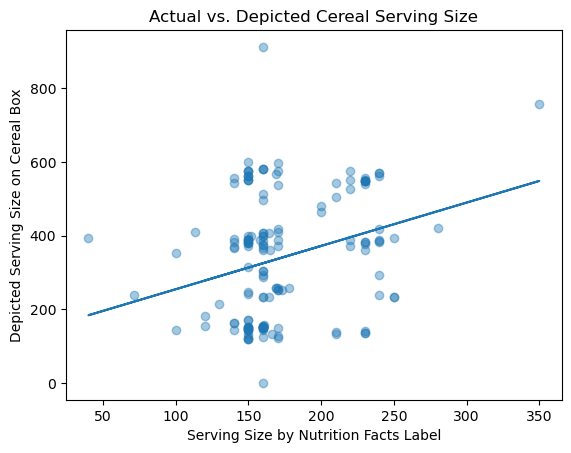

In [65]:
X = df[['serving_total_cals']]
y = df[['depicted_total_cals']]
line_fitter = LinearRegression()
line_fitter.fit(X,y)
predicted_depicted_total = line_fitter.predict(X)

plt.scatter(X, y, alpha=0.4)
plt.plot(X, predicted_depicted_total)
plt.title("Actual vs. Depicted Cereal Serving Size")
plt.xlabel("Serving Size by Nutrition Facts Label")
plt.ylabel("Depicted Serving Size on Cereal Box")
plt.savefig('cereal_serving_regression.png', bbox_inches="tight")
plt.show()

### Regression line

In [64]:
m = round(line_fitter.coef_[0][0], 2)
b = round(line_fitter.intercept_[0], 2)
print("The function that best predicts the relationship between suggested and depicted cereal serving size is: \ny=" + str(m) + '*x + ' + str(b))

The function that best predicts the relationship between suggested and depicted cereal serving size is: 
y=1.18*x + 136.66
